<a href="https://colab.research.google.com/github/seeratfatima19/CODSOFT/blob/main/churn_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install TensorFlow Decision Forests.
!pip install tensorflow_decision_forests --upgrade

In [60]:
import tensorflow as tf
import tensorflow_decision_forests as tfdf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns


In [3]:
from google.colab import drive

In [4]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [40]:
data = pd.read_csv('/content/drive/MyDrive/Churn_Modelling.csv')

In [6]:
#defining helper functions here

def make_dictionary(array):
  my_dict={}

  for i in range(0,len(array)):
    my_dict[array[i]] = i+1

  return my_dict

In [7]:
# Iterates through a column of data, and changes its keys with their corresponding values in a dictionary.

def swap_keys_values(data, dictionary):

  for i in range(0,len(data['geography'])):
    new_key= dictionary[data['geography'][i]]
    data['geography'][i] = new_key

    if data['gender'][i]=='Female':
      data['gender'][i]=1
    if data['gender'][i]=='Male':
      data['gender'][i]=0

In [41]:
data.head()


,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [42]:
# starting preprocessing
data.columns = data.columns.str.lower()
data.drop(['rownumber','customerid','surname'],axis=1,inplace=True)
data.head()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [43]:
array = data.geography.unique()
my_dict = make_dictionary(array)
print(my_dict)

print(data['geography'][4])


{'France': 1, 'Spain': 2, 'Germany': 3}
Spain


In [44]:
swap_keys_values(data,my_dict) # changing string into numerical values for better model working
data.head()

<ipython-input-7-351e1502a597>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['geography'][i] = new_key
<ipython-input-7-351e1502a597>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['gender'][i]=1
<ipython-input-7-351e1502a597>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['gender'][i]=0


,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
0,619,1,1,42,2,0.00,1,1,1,101348.88,1
1,608,2,1,41,1,83807.86,1,0,1,112542.58,0
2,502,1,1,42,8,159660.80,3,1,0,113931.57,1
3,699,1,1,39,1,0.00,2,0,0,93826.63,0
4,850,2,1,43,2,125510.82,1,1,1,79084.10,0


<Axes: xlabel='exited', ylabel='count'>

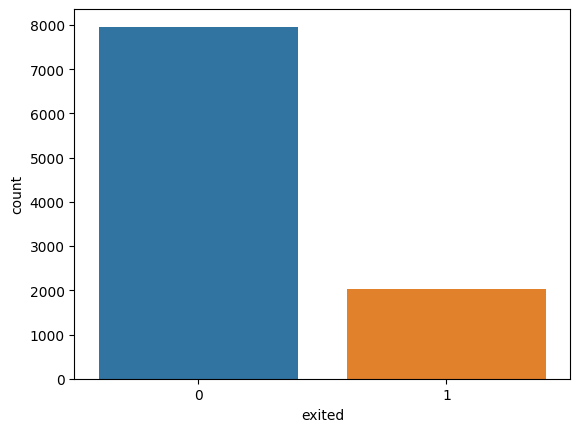

In [62]:
sns.countplot(data=data,x='exited')

<ipython-input-76-d6cf98581f7c>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


<Axes: >

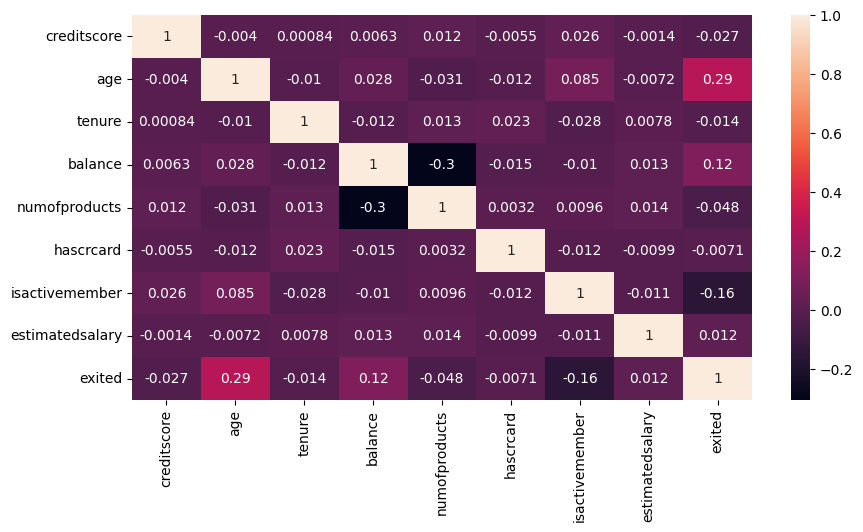

In [76]:
# show a heatmap by creating a correlation matrix

corr_matrix = data.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr_matrix,annot=True)


In [46]:
#split data into training and testing data

train_df, test_df = train_test_split(data,test_size=0.2)
print(train_df.shape)
print(test_df.shape)

(8000, 11)
(2000, 11)


In [47]:
train_df.head()


,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
6353,598,1,0,35,8,114212.60,1,1,1,74322.85,0
124,625,1,1,28,3,0.00,1,0,0,183646.41,0
8872,685,1,0,30,2,0.00,2,1,1,140889.32,0
1005,521,3,0,52,5,116497.31,3,0,0,53793.10,1
517,779,3,0,37,7,120092.52,2,1,0,135925.72,0


In [48]:

test_df.head()

,creditscore,geography,gender,age,tenure,balance,numofproducts,hascrcard,isactivemember,estimatedsalary,exited
6201,612,1,0,41,5,0.00,3,0,0,151256.22,0
3275,658,1,0,25,3,0.00,2,0,1,173948.40,0
5871,479,1,1,33,2,208165.53,1,0,0,50774.81,1
7707,848,2,0,35,5,120046.74,2,1,0,84710.65,0
4267,711,1,1,41,3,145754.91,1,1,1,101455.07,0


In [49]:
tf_dataset = tfdf.keras.pd_dataframe_to_tf_dataset(train_df, label="exited")  #change dataframe into tf dataset


model = tfdf.keras.GradientBoostedTreesModel(num_trees=1000,max_depth=8)
model.fit(tf_dataset)

print(model.summary())

Use /tmp/tmpppjpz2fl as temporary training directory
Reading training dataset...
Training dataset read in 0:00:00.203508. Found 8000 examples.
Training model...
Model trained in 0:00:01.535346
Compiling model...
Model compiled.
Model: "gradient_boosted_trees_model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
Total params: 1 (1.00 Byte)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 1 (1.00 Byte)
_________________________________________________________________
Type: "GRADIENT_BOOSTED_TREES"
Task: CLASSIFICATION
Label: "__LABEL"

Input Features (10):
	age
	balance
	creditscore
	estimatedsalary
	gender
	geography
	hascrcard
	isactivemember
	numofproducts
	tenure

No weights

Variable Importance: INV_MEAN_MIN_DEPTH:
    1.             "age"  0.574470 ################
    2.   "numofproducts"  0.267109 ####
    3.         "balance"  0.188315 ##
    4.  "isactivemember"  0.182107 #
    5.     "c

In [50]:
tf_test_dataset= tfdf.keras.pd_dataframe_to_tf_dataset(test_df,label='exited')

model.compile(metrics=['accuracy'])
results = model.evaluate(tf_test_dataset)
print(results)

2/2 [==============================] - 0s 9ms/step - loss: 0.0000e+00 - accuracy: 0.8645
[0.0, 0.8644999861717224]


In [59]:
# function to convert probabilties into labels where 1=exited and 0=not exited
def change_to_label(y_pred):
  array=[]
  for i in y_pred:
    if i>0.5:
      array.append(1)
    else:
      array.append(0)
  return array


In [58]:

y_pred = model.predict(tf_test_dataset)
print(y_pred)

print(change_to_label(y_pred))


2/2 [==============================] - 0s 12ms/step
[[0.87695765]
 [0.02158882]
 [0.18351641]
 ...
 [0.07293231]
 [0.0324778 ]
 [0.04915557]]
[1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,

<Axes: xlabel='exited', ylabel='count'>

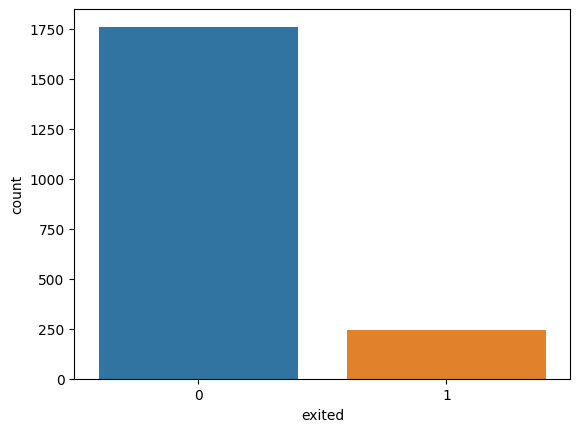

In [71]:
#plotting predicted data

df = pd.DataFrame(change_to_label(y_pred),columns=['exited'])
sns.countplot(data=df,x='exited')


In [54]:
model.get_metrics_result()


{'loss': <tf.Tensor: shape=(), dtype=float32, numpy=0.0>,
 'accuracy': <tf.Tensor: shape=(), dtype=float32, numpy=0.8645>}